# Comparison: Robot

https://archive.ics.uci.edu/ml/datasets/Robot+Execution+Failures

In [2]:
from google.colab import drive
import sys
import os

drive.mount('/content/drive/')
sys.path.append('/content/drive/MyDrive/Project/EDQC/dqc')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Initialization

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from utils.visualization import animator


## Reading Data

In [4]:
datas = []
for i in range(1,6):
  datas.append(pd.read_csv(f'https://archive.ics.uci.edu/ml/machine-learning-databases/robotfailure-mld/lp{i}.data', header=None))

label = 'robot'

In [5]:
ddf = []

for data in datas:
  df = pd.DataFrame(columns=['class']+list(range(15)))

  for i in data.index:
    idx = i // 16
    r = data.loc[i,0]
    if i % 16 == 0:
      df.loc[idx, 'class'] = data.loc[i,0]
    else:
      r = r.split('\t')
      for j in range(6):
        df.loc[idx, (i % 16 - 1) * 6 + j] = float(r[j+1])
  ddf.append(df)

df = pd.concat(ddf).reset_index(drop=True)

In [6]:
for col in range(90):
  df[col] = df[col].astype(int)


In [7]:
df['class'].drop_duplicates().shape

(16,)

In [8]:
df.duplicated().sum()

48

In [9]:
classes = df['class']
df.drop(['class'], axis=1, inplace=True)

In [10]:
df.duplicated().sum()

212

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
classes = classes.loc[df.index]

In [13]:
classes.value_counts()

collision            88
normal               65
obstruction          55
fr_collision         16
left_col              9
back_col              6
front_col             6
right_col             5
collision_in_part     1
Name: class, dtype: int64

In [14]:
ff = '''collision            88
normal               65
obstruction          55
fr_collision         16
left_col              9
back_col              6
front_col             6
right_col             5
collision_in_part     1'''

f = ''

for fff in ff.split('\n'):
  f += f'\item {fff}\n'

In [15]:
print(f)

\item collision            88
\item normal               65
\item obstruction          55
\item fr_collision         16
\item left_col              9
\item back_col              6
\item front_col             6
\item right_col             5
\item collision_in_part     1



## Exploratory Data Analysis

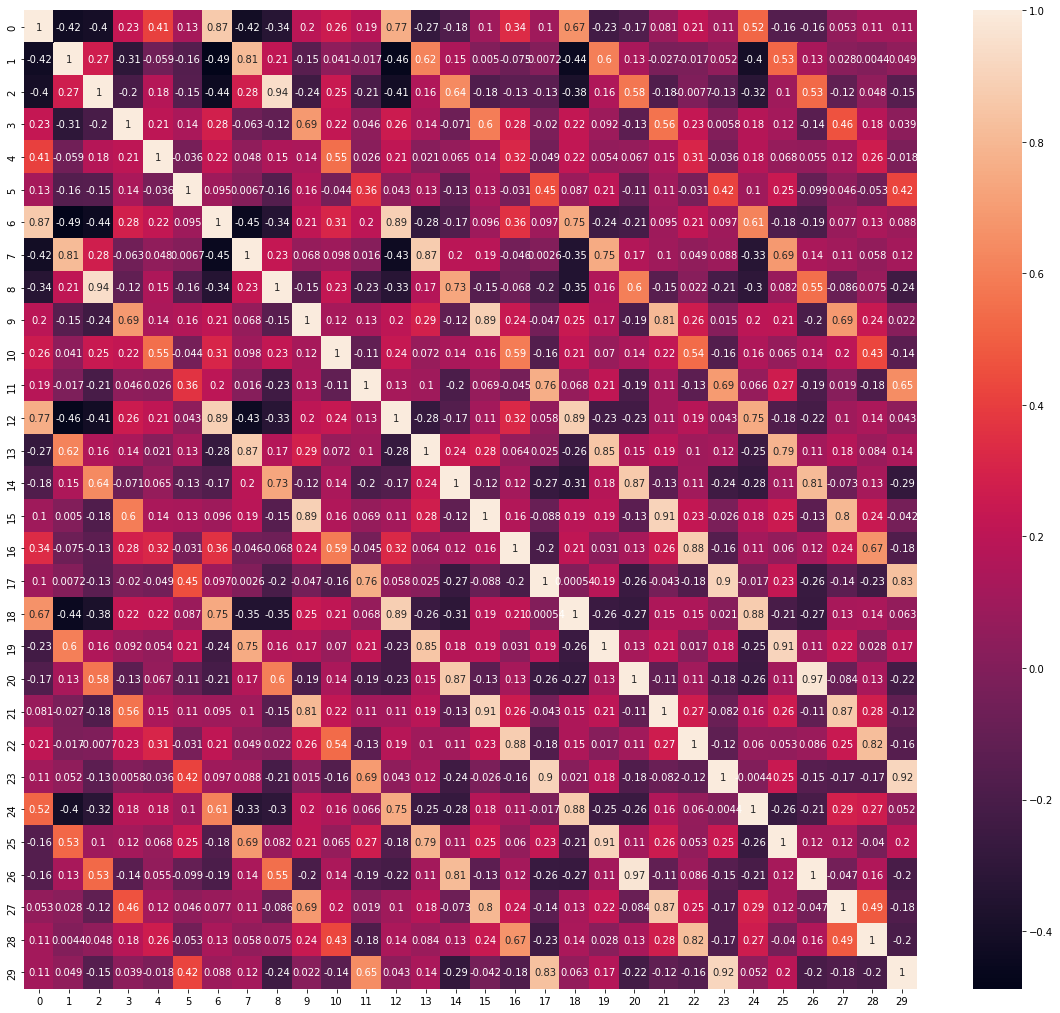

In [14]:
plt.figure(figsize=(20,18))
sns.heatmap(df[range(30)].corr(), annot=True)

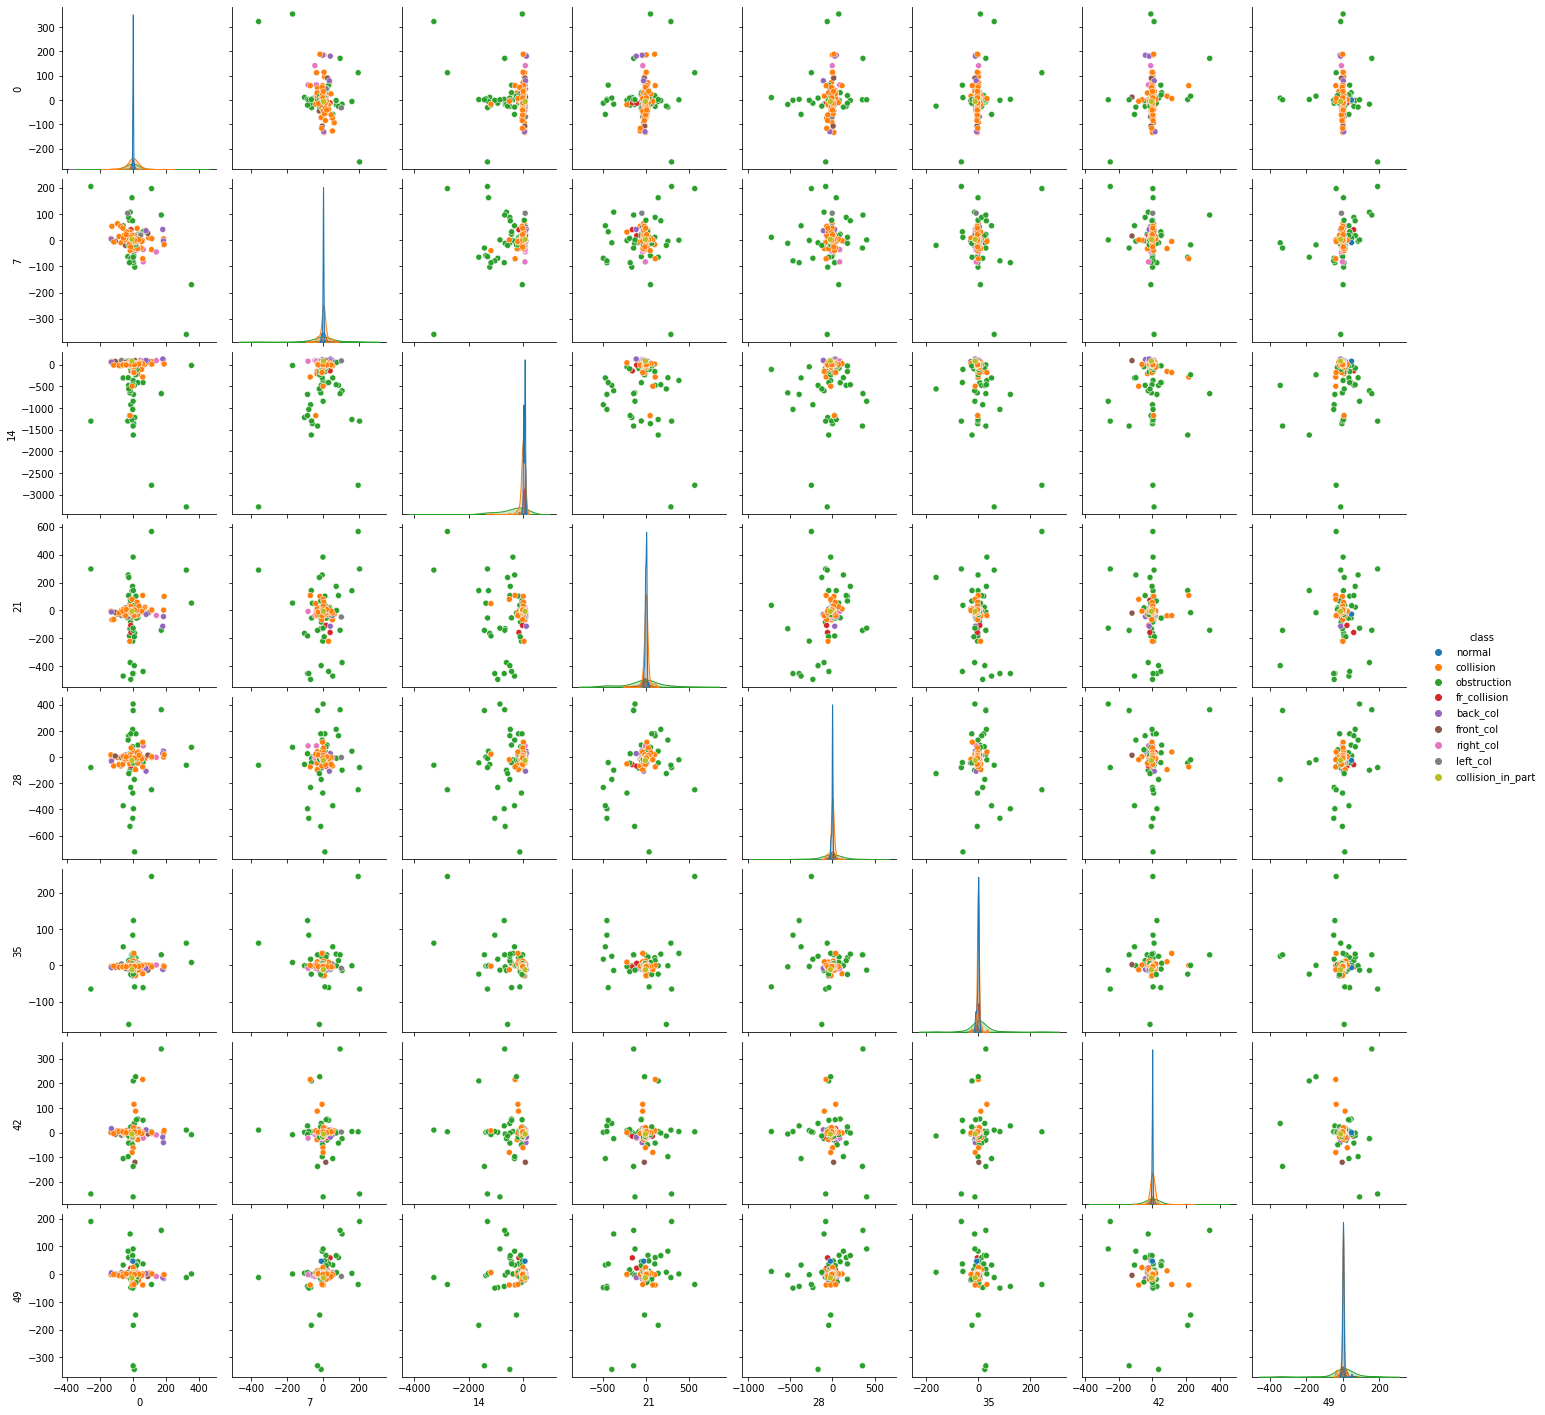

In [15]:
df['class'] = classes
sns.pairplot(df[[i * 6 + i for i in range(8)]+ ['class']], hue='class')
df.drop('class', axis=1, inplace=True)

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=90, random_state=0)
df_pca = pd.DataFrame(pca.fit_transform(df))

In [17]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,-651.257423,-80.122139,-69.758113,-38.547952,-20.950496,29.149081,-12.101767,-6.686521,-12.290519,-20.619425,...,-0.059587,0.445596,-0.759174,-0.051881,0.421323,0.088512,-0.113435,0.311886,-0.534661,-0.235745
1,-650.526733,-76.344117,-73.473310,-35.052305,-21.135807,26.279905,-16.336303,-7.331656,-10.326223,-24.334383,...,0.413942,0.840178,-0.486108,-0.015622,-1.059389,1.379203,-0.120162,0.609240,0.810207,0.336955
2,-647.858734,-76.510324,-70.549171,-32.405559,-18.471402,20.892067,-11.593622,-6.027511,-5.240244,-15.697919,...,-0.167924,0.736946,-0.672084,-0.817716,0.231177,1.023932,-0.046510,-0.121768,-1.466266,0.365178
3,-652.430686,-71.949592,-72.884319,-27.258527,-22.138646,25.069311,-4.815083,-2.558537,-10.312286,-20.255663,...,0.952434,-0.612246,-0.723656,-0.164238,-0.422467,-0.918986,0.097570,1.621518,-0.238594,-0.776876
4,-644.733117,-72.926374,-70.111150,-23.018966,-30.071869,20.199751,-8.024374,-6.295479,-12.355979,-20.844332,...,1.142842,0.892064,-0.800679,0.175653,-0.235775,-0.749926,-0.268971,-0.139044,0.240902,-1.219142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,-447.638059,-34.486346,-62.150762,-81.464176,13.959610,21.899854,-32.339149,18.650852,-21.817167,-41.058070,...,0.976034,0.082514,-0.091996,0.288264,-0.303674,-1.665643,-0.672737,-0.085326,-0.042894,-0.452184
247,-446.323470,-17.451760,-60.750000,-43.706890,3.621811,19.462715,-8.768524,-14.173333,5.634865,0.988019,...,0.096449,-0.079677,-0.194662,1.470958,-0.545949,0.345857,0.225453,-0.037519,-0.486755,-0.278752
248,-440.130022,-14.001605,-41.509663,-36.059509,10.355879,12.082408,-7.645936,-20.259302,6.374741,23.926838,...,0.739193,-0.302840,1.126012,-0.066283,-0.409058,0.581706,-0.330404,0.661618,1.544221,0.494935
249,-432.454327,-16.049191,-39.904829,-59.226039,8.263089,16.088392,-7.456918,-11.774634,-9.644973,-16.055860,...,-1.352520,-0.769000,-1.097178,0.854782,0.691920,0.490632,-0.560702,0.687107,0.290483,-0.007336


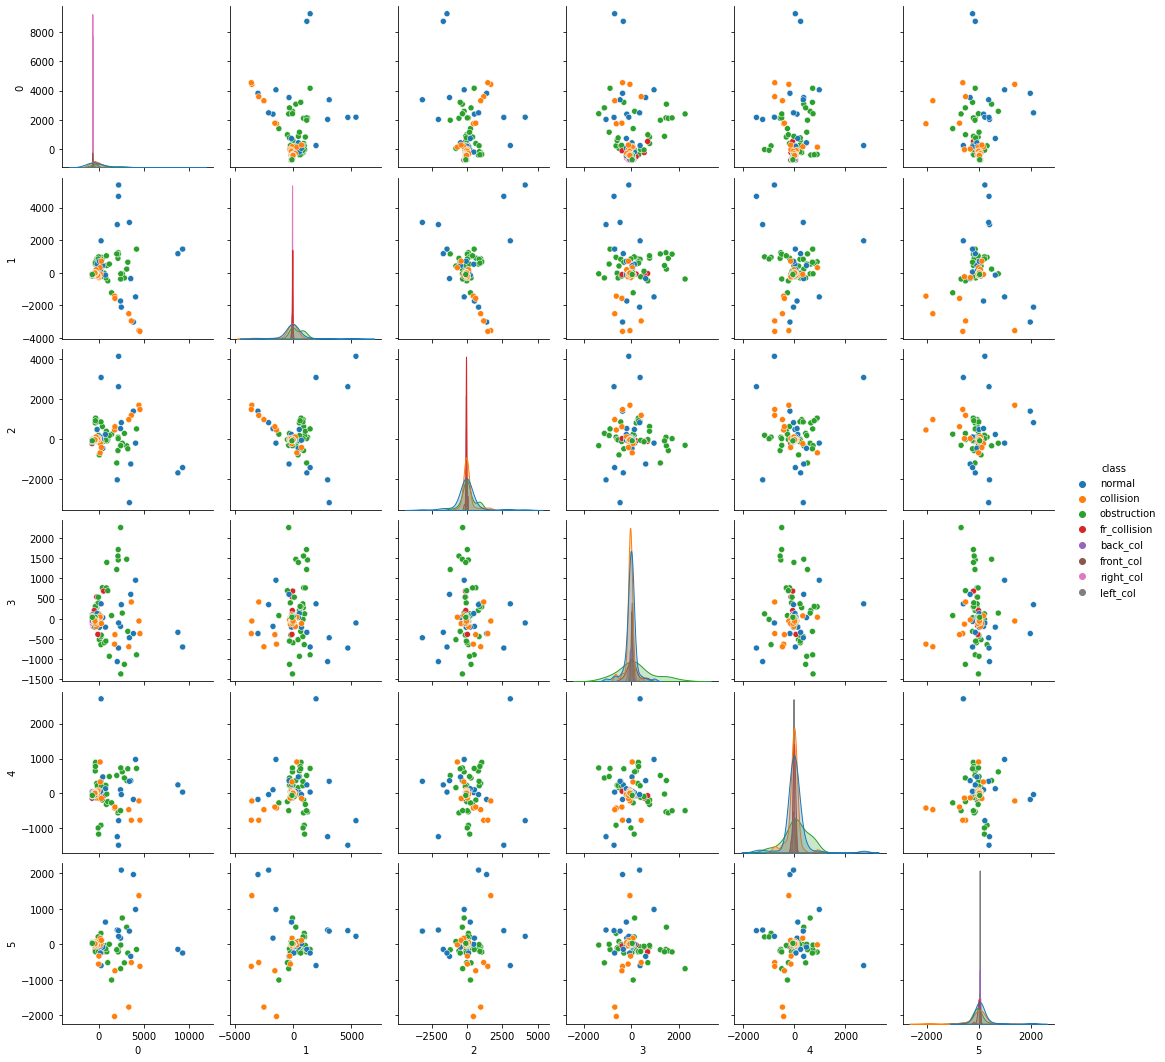

In [18]:
# ddf = df.copy()[[0,1,2,3,4,5]]
df_pca['class'] = classes

sns.pairplot(df_pca[list(range(6)) + ['class']], hue='class')

df_pca.drop('class', axis=1, inplace=True)

In [35]:
import matplotlib as mpl
cmap = mpl.cm.get_cmap('Paired')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

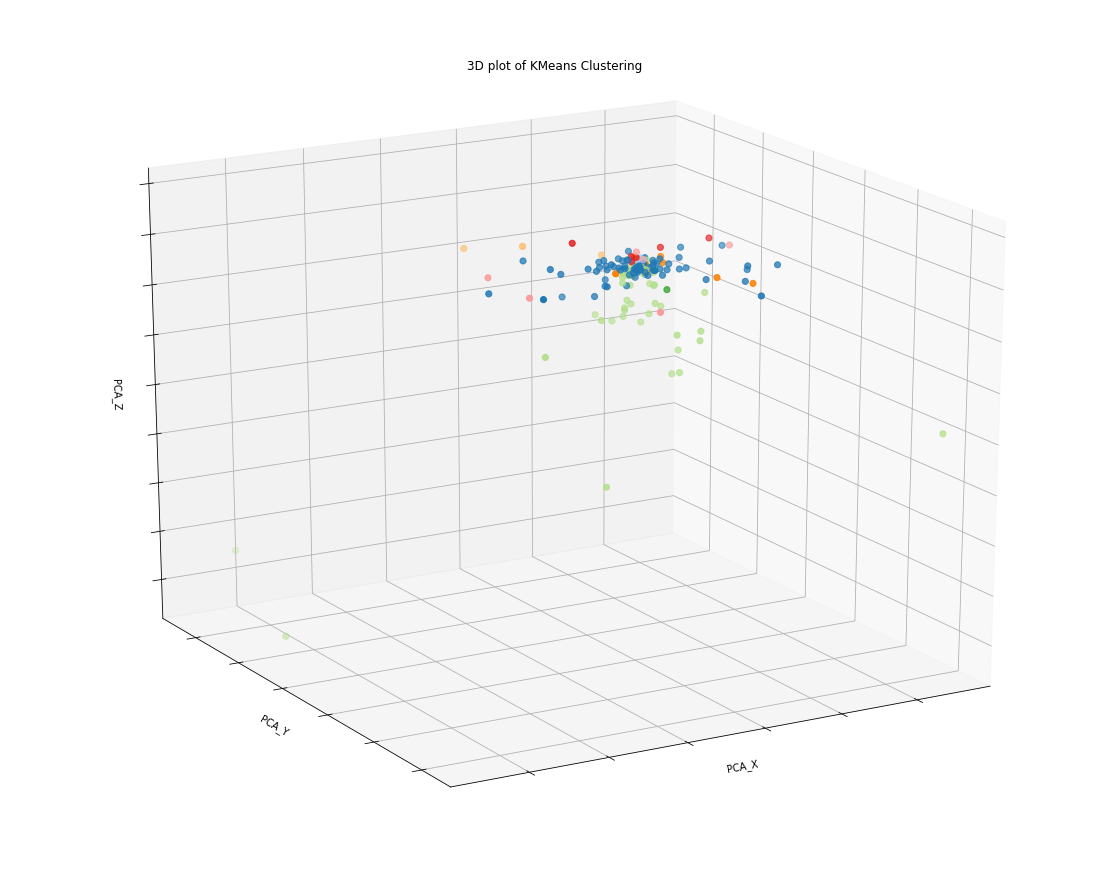

In [20]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
labels = classes.apply(lambda r: cmap(classes.drop_duplicates().tolist().index(r)))
ax.scatter(df[0], df[1], df[2], c=labels, marker='.', s=150)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PCA_X')
ax.set_ylabel('PCA_Y')
ax.set_zlabel('PCA_Z')
ax.set_title('3D plot of KMeans Clustering')


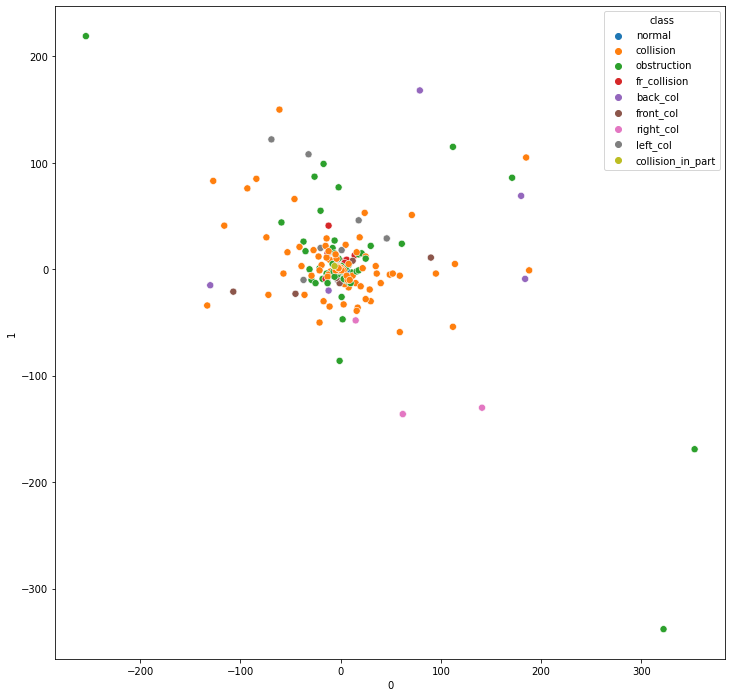

In [21]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df[0], y=df[1], hue=classes, legend=True, s=50)
# plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='x', s=150, c='black')

## 

In [23]:
from   model.dqc import DQC
import model.base_dqc as dqc

In [19]:
def run_model(df, SIGMA = 0.01, M = 0.07):
  edqc = DQC(df)
  edqc.calculate_N(SIGMA)
  N = np.array(edqc.N)
  data_fit = np.array(edqc.data_fit)
  H = dqc.calculate_H(data_fit,SIGMA,M)
  H = dqc.basis_transform(H,N)
  H = (np.abs(H) <= 1) * 1 + (np.abs(H) > 1) * -1
  X = dqc.calculate_X(data_fit,M)
  X = dqc.basis_transform(X,N,is_expectation=True)

  P,H = dqc.diagonalize_H(H)

  H = np.round(H, 4)

  # H = H < -4

  traj,N_traj = dqc.trajectory(df,P,H,X,N,steps=10000,delta=10**4,sigma=SIGMA,m=M,stride=50)
  S = dqc.reverse_entropy(traj, N_traj)

  return N, H, X , P, traj, N_traj, S

In [20]:
df_normal = pd.DataFrame()

for col in df.columns:
  df_normal[col] =  (df[col] - df[col].min())/(df[col].max() - df[col].min())

In [24]:
N, H, X , P, traj, N_traj, S = run_model(df_pca, SIGMA = 0.1, M = 0.001)

/content/drive/MyDrive/Project/EDQC/dqc/model/base_dqc.py:229: ComplexWarning: Casting complex values to real discards the imaginary part
  H_diag[i] = evals[i] * H_diag[i]
/content/drive/MyDrive/Project/EDQC/dqc/model/base_dqc.py:391: RuntimeWarning: divide by zero encountered in double_scalars
  S[step] = S[step] - 1/p * np.log(1/p)


Text(0, 0.5, 'Reverse Entropy (1/S)')

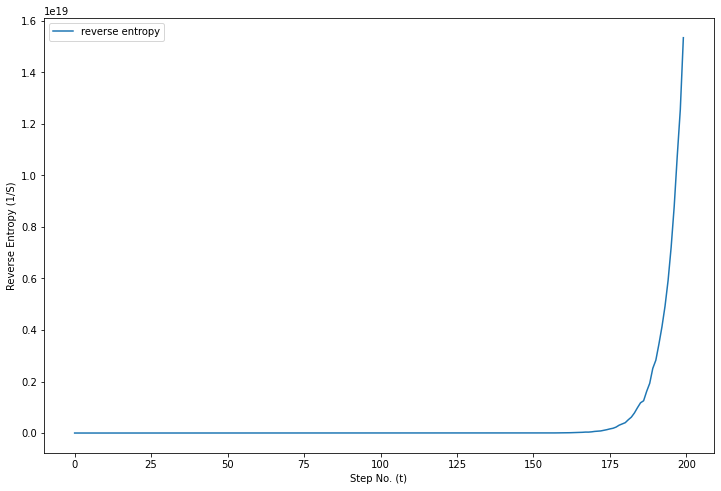

In [25]:
ax = pd.DataFrame(1/S, columns=['reverse entropy']).plot(figsize=(12,8), )
ax.set_xlabel("Step No. (t)")
ax.set_ylabel("Reverse Entropy (1/S)")

In [ ]:
H

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


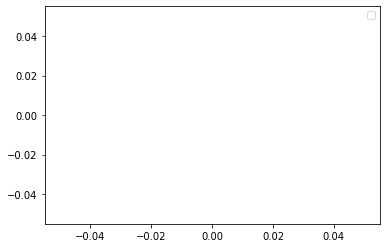

In [27]:
HH = H.diagonal()
c = classes.reset_index(drop=True)
la = list(c[c == 'M'].index)
lb = list(c[c == "B"].index)
sns.distplot(HH[la],hist=False, label='M')
sns.distplot(HH[lb],hist=False, label='B')
plt.legend()

In [28]:
np.round(HH * 4, 0)/4

array([229.5 , -82.5 , -23.25, -15.25, -12.  ,  12.5 , -11.25,  12.25,
       -10.25,  11.  ,  -9.5 ,  -9.25,  -9.  ,  -8.  ,  -7.75,  -7.25,
        -7.5 ,  -6.75,   9.75,   9.5 ,   9.  ,   8.75,   8.5 ,   7.75,
         7.5 ,   7.25,   6.75,   6.5 ,   6.25,  -6.25,  -6.  ,  -5.75,
        -5.5 ,  -5.  ,   6.  ,   5.75,   5.25,   5.5 ,  -5.  ,  -4.5 ,
        -4.25,   4.75,   4.75,   4.25,   4.25,   3.75,   3.75,   3.5 ,
        -4.  ,  -3.75,  -3.75,  -3.25,  -3.25,  -3.  ,  -2.75,  -2.5 ,
        -2.25,   3.  ,   3.  ,   2.75,   2.75,   2.25,   2.25,  -2.5 ,
        -2.  ,   2.  ,   1.75,   1.75,  -1.75,  -1.5 ,  -1.5 ,   1.5 ,
         1.25,   1.  ,   1.  ,  -1.  ,  -1.  ,  -0.75,   0.5 ,   0.5 ,
         0.5 ,  -0.5 ,  -0.5 ,  -0.25,  -0.25,   0.  ,  -0.  ,   0.  ,
         0.  ,   0.  ,  -0.  ,  -0.  ,  -0.  ,   0.  ,   0.  ,   0.  ,
        -0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  -0.  ,  -0.  ,  -0.  ,
        -0.  ,   0.  ,   0.  ,   0.  ,  -0.  ,  -0.  ,   0.  ,   0.  ,
      

In [29]:
rr = np.real(np.round(traj))

In [45]:
# classes = classes.tolist()
classes_ = list(set(classes))

In [46]:
classes_

['front_col',
 'back_col',
 'normal',
 'right_col',
 'left_col',
 'obstruction',
 'fr_collision',
 'collision',
 'collision_in_part']

In [49]:
color_selection = [((i, i),  cmap(classes_.index(classes[i]))) for i in range(len(classes)) ]

In [ ]:
directory = '/content/drive/MyDrive/Project/EDQC/data/uci/{}/'.format(label.lower())

if not os.path.exists(directory):
        os.mkdir(directory)
        
os.chdir(directory)

_tmp = dqc.plot_steps(traj, color_selections=color_selection)
del(_tmp)

animator()

Streaming output truncated to the last 5000 lines.


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [38]:
1

1

In [ ]:
np.where((1/S).max() == 1/S)
